In [1]:
# Logistic Regression
import os
print (os.getcwd())
os.chdir("C://Digital Nest/Logistic Regression")
print (os.getcwd())

C:\Users\Vishnu Murthy Chakka
C:\Digital Nest\Logistic Regression


In [2]:
import numpy as np
import pandas as pd
iris = pd.read_csv('iris.csv')
iris.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [3]:
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
print(iris.columns.values)

['SepalLength' 'SepalWidth' 'PetalLength' 'PetalWidth' 'Species']


In [8]:
print(np.unique(iris.Species,return_counts=True))

(array(['setosa', 'versicolor', 'virginica'], dtype=object), array([50, 50, 50], dtype=int64))


In [9]:
iris.isnull().sum()

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Species        0
dtype: int64

In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
species = le.fit_transform(iris.Species)
print(species)
print(type(species))
print(species.shape)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
<class 'numpy.ndarray'>
(150,)


In [12]:
np.unique(species,return_counts=True)

(array([0, 1, 2], dtype=int64), array([50, 50, 50], dtype=int64))

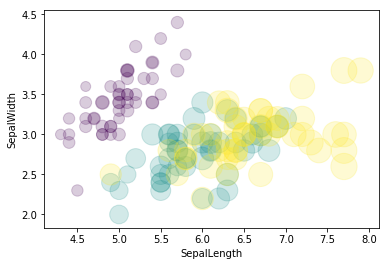

In [13]:
# 4 dimensional plot - 
import matplotlib.pyplot as plt
plt.scatter(iris.SepalLength,
            iris.SepalWidth,
            alpha = 0.2,                             # transeperency level
            s = 100*iris.PetalLength,                # size of dot depends on petal length
            c = species,                             # colour based on target/species
            cmap = 'viridis')                        # various colour maps present
plt.xlabel(iris.columns.values[0])
plt.ylabel(iris.columns.values[1])
plt.show()

In [14]:
# split the file into Independent and dependent variables
irisX = pd.DataFrame(iris,columns=['SepalLength','SepalWidth','PetalLength','PetalWidth'])
irisY = pd.DataFrame(iris,columns=["Species"])
print(irisX.head())
print(irisY.head())

   SepalLength  SepalWidth  PetalLength  PetalWidth
0          5.1         3.5          1.4         0.2
1          4.9         3.0          1.4         0.2
2          4.7         3.2          1.3         0.2
3          4.6         3.1          1.5         0.2
4          5.0         3.6          1.4         0.2
  Species
0  setosa
1  setosa
2  setosa
3  setosa
4  setosa


In [15]:
# splitting the data into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(irisX, irisY, test_size = 0.30, random_state = 0)
print(type(X_train))
print(type(Y_train))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [16]:
# build logistic model using sklearn
from sklearn import linear_model
# initialize logistic model
lm = linear_model.LogisticRegression()
# apply linear model without adding any column for constant
logitmodel = lm.fit(X_train, Y_train.Species)

In [17]:
print(logitmodel.coef_)
print(logitmodel.intercept_)
print(logitmodel.n_iter_)

[[ 0.40093674  1.31024707 -2.09750955 -0.95694164]
 [ 0.37732968 -1.39413979  0.41885057 -1.10535497]
 [-1.66919225 -1.18195572  2.39508793  2.00963854]]
[ 0.24944929  0.81140352 -0.97217812]
[7]


In [19]:
# predict on train & test data
Train_predict = logitmodel.predict(X_train)
Test_predict = logitmodel.predict(X_test)
print((Test_predict))

['virginica' 'versicolor' 'setosa' 'virginica' 'setosa' 'virginica'
 'setosa' 'versicolor' 'versicolor' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'setosa' 'virginica' 'versicolor'
 'setosa' 'setosa' 'virginica' 'virginica' 'setosa' 'setosa' 'virginica'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'setosa' 'virginica'
 'virginica' 'setosa' 'virginica' 'virginica' 'virginica' 'setosa'
 'virginica' 'versicolor' 'versicolor' 'virginica' 'setosa' 'virginica'
 'setosa' 'setosa']


In [20]:
# confusion matrix for train
from sklearn.metrics import confusion_matrix, classification_report
print (confusion_matrix(Y_train,Train_predict))
print (classification_report(Y_train,Train_predict))

[[34  0  0]
 [ 0 26  6]
 [ 0  0 39]]
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        34
 versicolor       1.00      0.81      0.90        32
  virginica       0.87      1.00      0.93        39

avg / total       0.95      0.94      0.94       105



In [21]:
# confusion matrix for test
from sklearn.metrics import confusion_matrix, classification_report
print (confusion_matrix(Y_test,Test_predict))
print (classification_report(Y_test,Test_predict))

[[16  0  0]
 [ 0 13  5]
 [ 0  0 11]]
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        16
 versicolor       1.00      0.72      0.84        18
  virginica       0.69      1.00      0.81        11

avg / total       0.92      0.89      0.89        45



In [22]:
import pickle
pickle.dump(logitmodel, open('iris.sav', 'wb'))

In [7]:
# make species binary
species[species == 2] = 1
print(species)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


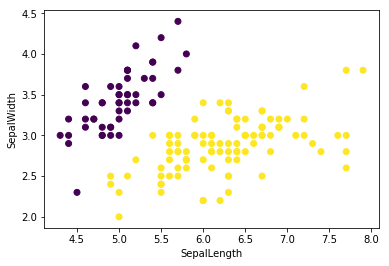

In [29]:
# plot 3 dimensional plot
import matplotlib.pyplot as plt
plt.scatter(iris.SepalLength,
            iris.SepalWidth,
            c = species,                             # colour based on target/species
            cmap = 'viridis')                        # various colour maps present
plt.xlabel(iris.columns.values[0])
plt.ylabel(iris.columns.values[1])
plt.show()

In [20]:
# split the file into Independent and dependent variables
irisX = pd.DataFrame(iris,columns=['SepalLength','SepalWidth'])
#irisY = pd.DataFrame(species)
print(irisX.head())
#print(irisY.head())

   SepalLength  SepalWidth
0          5.1         3.5
1          4.9         3.0
2          4.7         3.2
3          4.6         3.1
4          5.0         3.6


In [21]:
# splitting the data into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(irisX, species, test_size = 0.30, random_state = 0)
print(type(X_train))
print(type(Y_train))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [22]:
# build logistic model using sklearn
from sklearn import linear_model
# initialize logistic model
lm = linear_model.LogisticRegression()
# apply linear model without adding any column for constant
logitmodel = lm.fit(X_train, Y_train)

In [24]:
print(logitmodel.coef_)
print(logitmodel.intercept_)

[[ 2.18972398 -3.49838946]]
[-0.77182114]


In [30]:
line = (iris.SepalLength * 2.18) - (iris.SepalWidth * 3.49)
print(line[0:10])
print(line[45:55])
print(line[140:150])

0   -1.097
1    0.212
2   -0.922
3   -0.791
4   -1.664
5   -1.839
6   -1.838
7   -0.966
8   -0.529
9   -0.137
dtype: float64
45   -0.006
46   -2.144
47   -1.140
48   -1.359
49   -0.617
50    4.092
51    2.784
52    4.223
53    3.963
54    4.398
dtype: float64
140    3.787
141    4.223
142    3.221
143    3.656
144    3.089
145    4.136
146    5.009
147    3.700
148    1.650
149    2.392
dtype: float64


In [35]:
line2 = line
line2[line2 > 0] = 1
line2[line2 < 0] = -1
np.unique(line2,return_counts=True)

(array([-1.,  1.]), array([ 47, 103], dtype=int64))

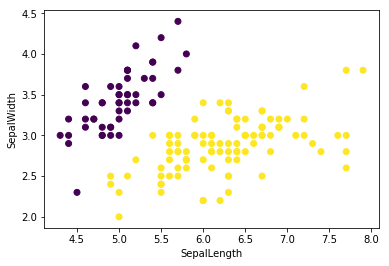

In [33]:
# plot 3 dimensional plot
import matplotlib.pyplot as plt
plt.scatter(iris.SepalLength,
            iris.SepalWidth,
            c = species,                             # colour based on target/species
            cmap = 'viridis')                        # various colour maps present
plt.xlabel(iris.columns.values[0])
plt.ylabel(iris.columns.values[1])
plt.show()

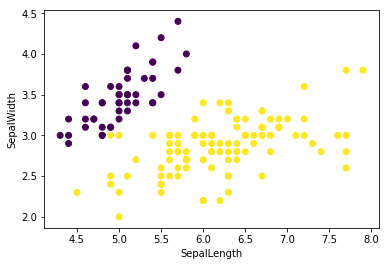

In [36]:
# plot 3 dimensional plot
import matplotlib.pyplot as plt
plt.scatter(iris.SepalLength,
            iris.SepalWidth,
            c = line2,                             # colour based on target/species
            cmap = 'viridis')                        # various colour maps present
plt.xlabel(iris.columns.values[0])
plt.ylabel(iris.columns.values[1])
plt.show()